In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime

from eoles.write_output import comparison_simulations, comparison_simulations_new, plot_typical_week, plot_typical_demand, plot_residual_demand
from project.write_output import plot_compare_scenarios

# October 2023

In [ ]:
# SCC
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1003_235705_S2_N1_ref_scc"),
               "Ban S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_001351_S2_N1_restrictiongas_scc"),
               "Ban + reno S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_003158_S2_N1_restrictiongas_restrictionreno_scc"),
               "Ref S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_004924_S2p_N1_ref_scc"),
               "Ban S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_010632_S2p_N1_restrictiongas_scc"),
               "Ban + reno S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_012447_S2p_N1_restrictiongas_restrictionreno_scc"),
               "Ref S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_014201_S3_N1_ref_scc"),
               "Ban S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_015938_S3_N1_restrictiongas_scc"),
               "Ban + reno S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc/1004_021812_S3_N1_restrictiongas_restrictionreno_scc"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1004_policies_exogenous_scc")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [ ]:
# SCC + prices constant
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_023552_S2_N1_ref_scc_priceconstant"),
               "Ban S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_025301_S2_N1_restrictiongas_scc_priceconstant"),
               "Ban + reno S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_031111_S2_N1_restrictiongas_restrictionreno_scc_priceconstant"),
               "Ref S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_032830_S2p_N1_ref_scc_priceconstant"),
               "Ban S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_034602_S2p_N1_restrictiongas_scc_priceconstant"),
               "Ban + reno S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_040413_S2p_N1_restrictiongas_restrictionreno_scc_priceconstant"),
               "Ref S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_042148_S3_N1_ref_scc_priceconstant"),
               "Ban S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_043942_S3_N1_restrictiongas_scc_priceconstant"),
               "Ban + reno S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_priceconstant/1004_045804_S3_N1_restrictiongas_restrictionreno_scc_priceconstant"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1004_policies_exogenous_scc_priceconstant")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [ ]:
# SCC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_051547_S2_N1_ref_scc_pricefeedback"),
               "Ban S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_053317_S2_N1_restrictiongas_scc_pricefeedback"),
               "Ban + reno S2 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_055129_S2_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
               "Ref S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_060855_S2p_N1_ref_scc_pricefeedback"),
               "Ban S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_062606_S2p_N1_restrictiongas_scc_pricefeedback"),
               "Ban + reno S2p N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_064439_S2p_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
               "Ref S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_070211_S3_N1_ref_scc_pricefeedback"),
               "Ban S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_071949_S3_N1_restrictiongas_scc_pricefeedback"),
               "Ban + reno S3 N1": os.path.join("eoles/outputs/1004_policies_exogenous_scc_pricefeedback/1004_073811_S3_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
               }

results_resirf = {}
for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
    with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
        output = load(file)
        results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1004_policies_exogenous_scc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations(
    dict_output, ref="Ref S2 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [4]:
# NEW 1005 : SCC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    'Low gas': {
        "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_020535_S2_N1_ref_scc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_014828_S2_N1_ambitious_scc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_144031_S2_N1_restrictiongas_scc_pricefeedback"),
        "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_150025_S2_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
        },
    'Middle gas': {
        "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_030510_S2p_N1_ref_scc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_024745_S2p_N1_ambitious_scc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_150142_S2p_N1_restrictiongas_scc_pricefeedback"),
        "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_142328_S2p_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
        },
    'High gas': {
        "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_040509_S3_N1_ref_scc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_034755_S3_N1_ambitious_scc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_142236_S3_N1_restrictiongas_scc_pricefeedback"),
        "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_scc_pricefeedback/1005_144228_S3_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
        }
    }

# results_resirf = {}
# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1005_policies_exogenous_scc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=False, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
results_resirf["Reference"] = results_resirf.pop("Ref S2 N1")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

/Users/celia/Documents/These/python_projects/eoles2/eoles/write_output.py:781: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_system_costs_df = total_system_costs_df.append(hc_excluded)


ValueError: Columns must be same length as key

TypeError: 'AxesSubplot' object is not subscriptable

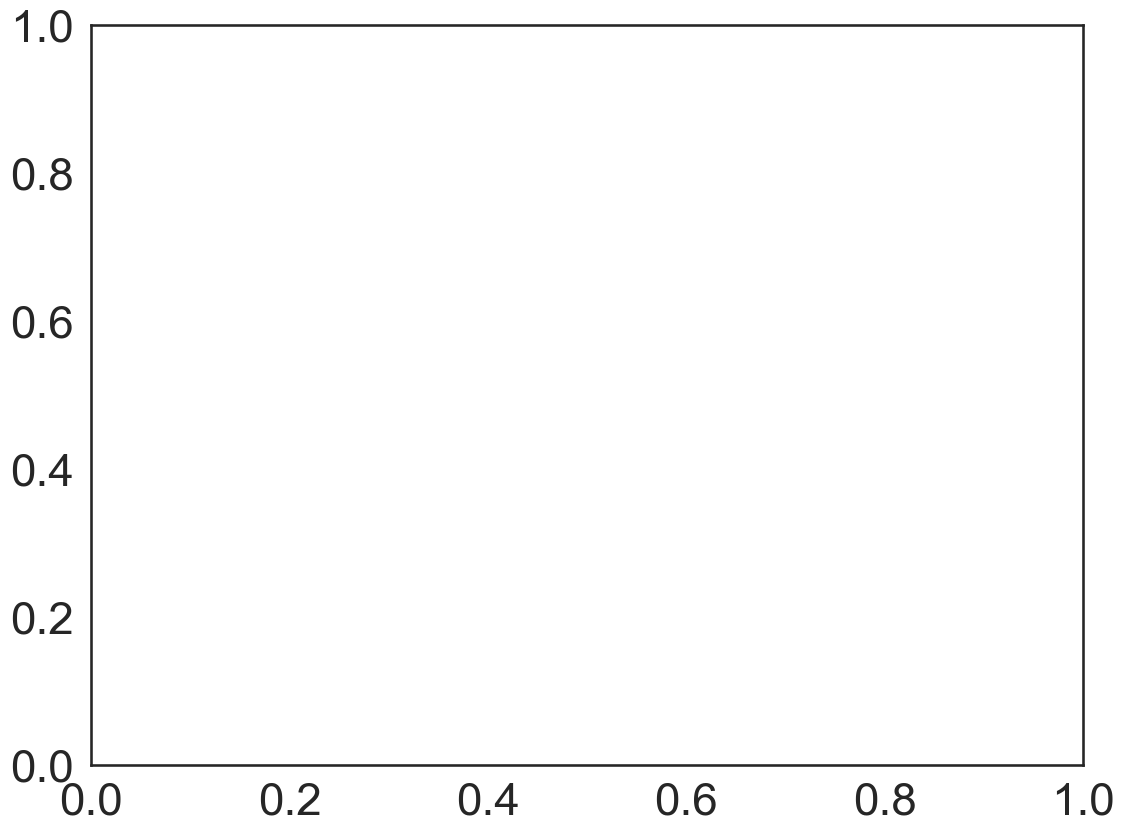

In [4]:
# NEW 1005 : CC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'Low gas': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122623_S2_N1_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124512_S2_N1_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
     'Middle gas': {
         "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback"),
         "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_234954_S2p_N1_ambitious_cc_pricefeedback"),
         "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124717_S2p_N1_restrictiongas_cc_pricefeedback"),
         "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_120953_S2p_N1_restrictiongas_restrictionreno_cc_pricefeedback")
     },
     # 'High gas': {
     #    "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_010610_S3_N1_ref_cc_pricefeedback"),
     #    "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_004919_S3_N1_ambitious_cc_pricefeedback"),
     #    "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_120831_S3_N1_restrictiongas_cc_pricefeedback"),
     #    "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122821_S3_N1_restrictiongas_restrictionreno_cc_pricefeedback")
     # }
}
# dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
#                "Ambitious S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
#                # "Ban S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_053317_S2_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_055129_S2_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                "Ref S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback"),
#                "Ambitious S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_234954_S2p_N1_ambitious_cc_pricefeedback"),
#                # "Ban S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_062606_S2p_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_064439_S2p_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                "Ref S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_010610_S3_N1_ref_cc_pricefeedback"),
#                "Ambitious S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_004919_S3_N1_ambitious_cc_pricefeedback"),
#                # "Ban S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_071949_S3_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_073811_S3_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                }

results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1005_policies_exogenous_cc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [8]:
# NEW 1005 : CC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'Low renewable': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_185003_S2p_N1ren_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183226_S2p_N1ren_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183146_S2p_N1ren_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_184857_S2p_N1ren_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
    #     'Low gas': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122623_S2_N1_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124512_S2_N1_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
    # 'Reindustrialization': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_175151_S2p_N1_reindus_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_175123_S2p_N1_reindus_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_180933_S2p_N1_reindus_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_181052_S2p_N1_reindus_restrictiongas_restrictionreno_cc_pricefeedback")
    #  },
     'Reference': {
         "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback"),
         "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_234954_S2p_N1_ambitious_cc_pricefeedback"),
         "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124717_S2p_N1_restrictiongas_cc_pricefeedback"),
         "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_120953_S2p_N1_restrictiongas_restrictionreno_cc_pricefeedback")
     },
     # 'Ambitious renewable': {
     #    "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192441_S2p_Opt_ref_cc_pricefeedback"),
     #    "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192639_S2p_Opt_ambitious_cc_pricefeedback"),
     #    "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190607_S2p_Opt_restrictiongas_cc_pricefeedback"),
     #    "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190805_S2p_Opt_restrictiongas_restrictionreno_cc_pricefeedback")
     # },
    # 'High gas': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_010610_S3_N1_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_004919_S3_N1_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_120831_S3_N1_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122821_S3_N1_restrictiongas_restrictionreno_cc_pricefeedback")
    #  }
}
# dict_output = {"Ref S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
#                "Ambitious S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
#                # "Ban S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_053317_S2_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S2 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_055129_S2_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                "Ref S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback"),
#                "Ambitious S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_234954_S2p_N1_ambitious_cc_pricefeedback"),
#                # "Ban S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_062606_S2p_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S2p N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_064439_S2p_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                "Ref S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_010610_S3_N1_ref_cc_pricefeedback"),
#                "Ambitious S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_004919_S3_N1_ambitious_cc_pricefeedback"),
#                # "Ban S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_071949_S3_N1_restrictiongas_scc_pricefeedback"),
#                # "Ban + reno S3 N1": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_073811_S3_N1_restrictiongas_restrictionreno_scc_pricefeedback"),
#                }

results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1005_policies_exogenous_cc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

## New config 10/2023

### New HC

In [3]:
# NEW 1010 : CC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'Low renewable': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_185003_S2p_N1ren_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183226_S2p_N1ren_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183146_S2p_N1ren_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_184857_S2p_N1ren_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
    #     'Low gas': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122623_S2_N1_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124512_S2_N1_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
    # 'Reindustrialization': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_175151_S2p_N1_reindus_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_175123_S2p_N1_reindus_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_180933_S2p_N1_reindus_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_181052_S2p_N1_reindus_restrictiongas_restrictionreno_cc_pricefeedback")
    #  },
     'Reference': {
         "Reference": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_185721_S2p_N1_ref_cc_pricefeedback"),
         "Ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_195810_S2p_N1_ambitious_cc_pricefeedback"),
         "Ban": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_210424_S2p_N1_ban_cc_pricefeedback"),
         "Ban + ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_210332_S2p_N1_ambitious_ban_cc_pricefeedback"),
         "Ban standalone": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_201151_S2p_N1_ban_standalone_cc_pricefeedback")
     },
     # 'Ambitious renewable': {
     #    "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192441_S2p_Opt_ref_cc_pricefeedback"),
     #    "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192639_S2p_Opt_ambitious_cc_pricefeedback"),
     #    "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190607_S2p_Opt_restrictiongas_cc_pricefeedback"),
     #    "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190805_S2p_Opt_restrictiongas_restrictionreno_cc_pricefeedback")
     # },
    'High gas': {
        "Reference": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_192808_S3_N1_ref_cc_pricefeedback"),
        "Ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_202920_S3_N1_ambitious_cc_pricefeedback"),
        "Ban": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/ban"),
        "Ban + reno": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1005_122821_S3_N1_restrictiongas_restrictionreno_cc_pricefeedback")
     }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1010_policies_exogenous_cc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
# # Problem to solve
results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

FileNotFoundError: [Errno 2] No such file or directory: 'eoles/outputs/1010_policies_exogenous_cc_pricefeedback/ban/coupling_results.pkl'

### Old HC

In [6]:
# NEW 1010 : CC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'Low renewable': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_185003_S2p_N1ren_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183226_S2p_N1ren_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183146_S2p_N1ren_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_184857_S2p_N1ren_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
    #     'Low gas': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122623_S2_N1_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124512_S2_N1_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
    # 'Reindustrialization': {
    #     "Reference": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_231058_S2p_N1_reindus_ref_cc_pricefeedback_hcDPE"),
    #     "Ambitious": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_223721_S2p_N1_reindus_ambitious_cc_pricefeedback_hcDPE"),
    #     "Ban": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_220130_S2p_N1_reindus_ban_cc_pricefeedback_hcDPE"),
    #     "Ban + ambitious": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_194743_S2p_N1_reindus_ambitious_ban_cc_pricefeedback_hcDPE")
    #  },
     'Reference': {
         "Reference": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_201614_S2p_N1_ref_cc_pricefeedback_hcDPE"),
         # "Ambitious": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_213834_S2p_N1_ambitious_cc_pricefeedback_hcDPE"),
         # "Ambitious insulation": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/ambitious_insu"),
         "Ban": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1014_013733_S2p_N1_ban_cc_pricefeedback_hcDPE"),
         "Ban + ambitious": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1014_023118_S2p_N1_ambitious_ban_cc_pricefeedback_hcDPE"),
     },
     # 'Ambitious renewable': {
     #    "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192441_S2p_Opt_ref_cc_pricefeedback"),
     #    "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192639_S2p_Opt_ambitious_cc_pricefeedback"),
     #    "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190607_S2p_Opt_restrictiongas_cc_pricefeedback"),
     #    "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190805_S2p_Opt_restrictiongas_restrictionreno_cc_pricefeedback")
     # },
    # 'High gas': {
    #     "Reference": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_192431_S3_N1_ref_cc_pricefeedback_hcDPE"),
    #     "Ambitious": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_223538_S3_N1_ambitious_cc_pricefeedback_hcDPE"),
    #     # "Ambitious insulation": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_210438_S3_N1_ambitious_insulation_cc_pricefeedback_hcDPE"),
    #     "Ban": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1014_020634_S3_N1_ban_cc_pricefeedback_hcDPE"),
    #     # "Ban + ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_011639_S3_N1_ambitious_ban_cc_pricefeedback_hcDPE"),
    #     "Ban + ambitious": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1014_001656_S3_N1_ambitious_ban_cc_pricefeedback_hcDPE"),
    #     # "Ban standalone": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_010611_S3_N1_ban_standalone_cc_pricefeedback_hcDPE")
    #  }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1016_policies_exogenous_cc_pricefeedback_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
# # Problem to solve
results_resirf["Reference"] = results_resirf.pop("Reference")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)



In [20]:
# NEW 1010 : CC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
     'Reference': {
         "Reference": os.path.join("eoles/outputs/1031_policies_exogenous_cc_pricefeedback_hcDPE/1031_013733_S2p_N1_ref_cc_pricefeedback_hcDPE"),
         # "Ambitious": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/1013_213834_S2p_N1_ambitious_cc_pricefeedback_hcDPE"),
         # "Ambitious insulation": os.path.join("eoles/outputs/1016_policies_exogenous_cc_pricefeedback_hcDPE/ambitious_insu"),
         "Ban": os.path.join("eoles/outputs/1031_policies_exogenous_cc_pricefeedback_hcDPE/1031_100419_S2p_N1_ban_cc_pricefeedback_hcDPE"),
         "Ban + ambitious": os.path.join("eoles/outputs/1031_policies_exogenous_cc_pricefeedback_hcDPE/1031_011654_S2p_N1_ambitious_ban_cc_pricefeedback_hcDPE"),
     }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1031_policies_exogenous_cc_pricefeedback_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
# # Problem to solve
results_resirf["Reference"] = results_resirf.pop("Reference")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)



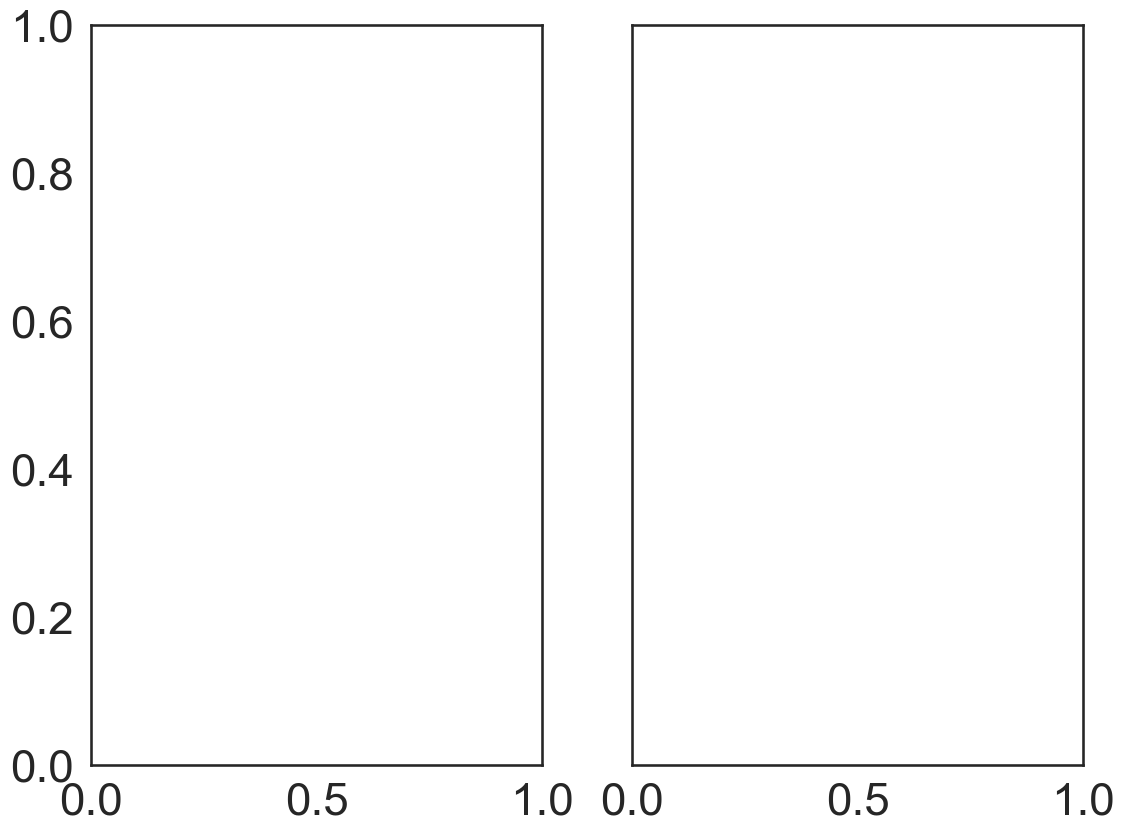

In [4]:
# NEW 1010 : CC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'Low renewable': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_185003_S2p_N1ren_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183226_S2p_N1ren_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_183146_S2p_N1ren_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_184857_S2p_N1ren_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
    #     'Low gas': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_224516_S2_N1_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_222827_S2_N1_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_122623_S2_N1_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124512_S2_N1_restrictiongas_restrictionreno_cc_pricefeedback")
    # },
    # 'Reindustrialization': {
    #     "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_175151_S2p_N1_reindus_ref_cc_pricefeedback"),
    #     "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_175123_S2p_N1_reindus_ambitious_cc_pricefeedback"),
    #     "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_180933_S2p_N1_reindus_restrictiongas_cc_pricefeedback"),
    #     "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_181052_S2p_N1_reindus_restrictiongas_restrictionreno_cc_pricefeedback")
    #  },
     'Reference': {
         "Reference": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1010_233655_S2p_N1_ref_cc_pricefeedback_hcDPE"),
         "Ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_003456_S2p_N1_ambitious_cc_pricefeedback_hcDPE"),
         "Ban": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_014821_S2p_N1_ban_cc_pricefeedback_hcDPE"),
         "Ban + ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_014119_S2p_N1_ambitious_ban_cc_pricefeedback_hcDPE"),
         "Ban standalone": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_005326_S2p_N1_ban_standalone_cc_pricefeedback_hcDPE")
     },
     # 'Ambitious renewable': {
     #    "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192441_S2p_Opt_ref_cc_pricefeedback"),
     #    "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_192639_S2p_Opt_ambitious_cc_pricefeedback"),
     #    "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190607_S2p_Opt_restrictiongas_cc_pricefeedback"),
     #    "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1006_190805_S2p_Opt_restrictiongas_restrictionreno_cc_pricefeedback")
     # },
    'High gas': {
        "Reference": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_000548_S3_N1_ref_cc_pricefeedback_hcDPE"),
        "Ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_011029_S3_N1_ambitious_cc_pricefeedback_hcDPE"),
        "Ambitious insulation": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_095310_S3_N1_ambitious_insulation_cc_pricefeedback_hcDPE"),
        "Ban": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_020352_S3_N1_ban_cc_pricefeedback_hcDPE"),
        # "Ban + ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_011639_S3_N1_ambitious_ban_cc_pricefeedback_hcDPE"),
        "Ban + ambitious insulation": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_101428_S3_N1_ambitious_insulation_ban_cc_pricefeedback_hcDPE"),
        # "Ban standalone": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback_hcDPE/1011_010611_S3_N1_ban_standalone_cc_pricefeedback_hcDPE")
     }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1010_policies_exogenous_cc_pricefeedback_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # Plots ResIRF
# # Problem to solve
results_resirf["Reference"] = results_resirf.pop("Reference")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

{'High gas Ambitious':                                                            2019         2020  \
 Stock (Million)                                       28.343678    28.630605   
 Stock existing (Million)                              27.608092    27.527226   
 Stock new (Million)                                    0.735586     1.103378   
 Surface (Million m2)                                2421.199829  2448.577449   
 Surface existing (Million m2)                       2352.130942  2344.974119   
 ...                                                         ...          ...   
 Mpr performance Single-family (Thousand househo...          NaN          NaN   
 Mpr performance insulation (Billion euro)                   NaN          NaN   
 Mpr performance insulation Multi-family (Thousa...          NaN          NaN   
 Mpr performance insulation Single-family (Thous...          NaN          NaN   
 Renovation Obligation (Thousand households)                 NaN          NaN   
 
    

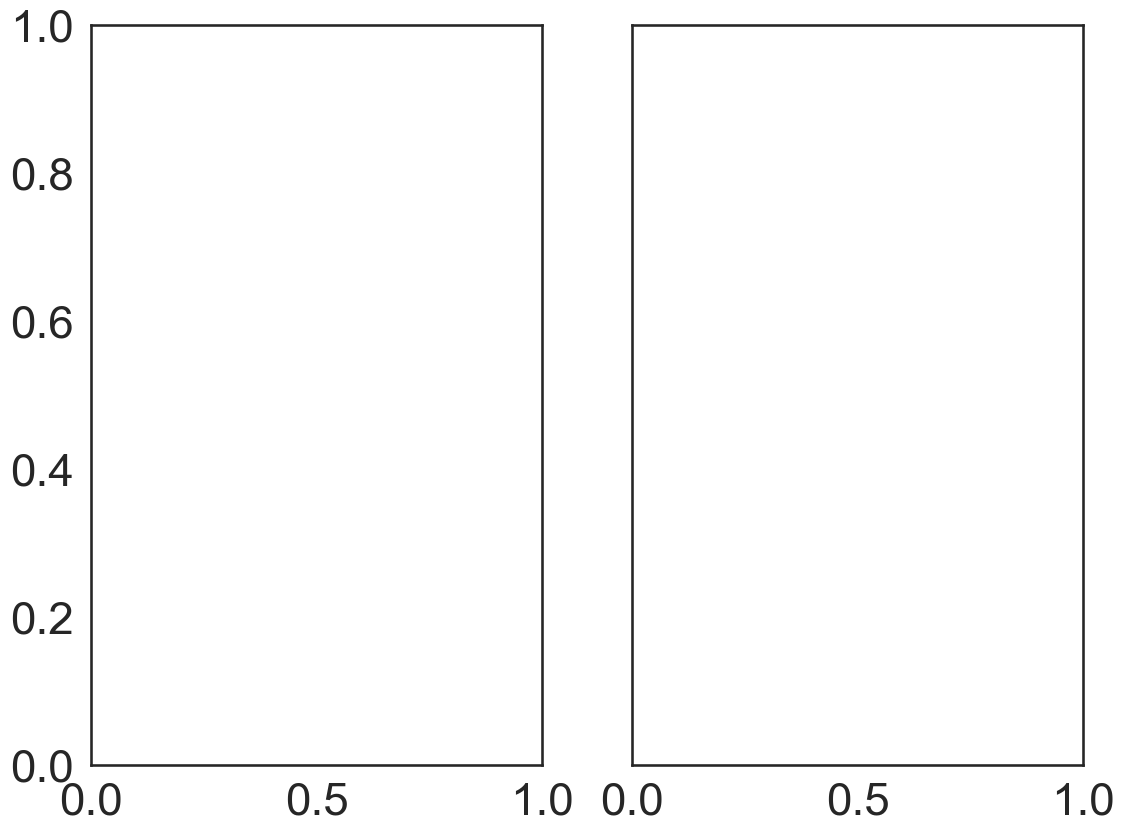

In [9]:
# NEW 1005 : CC + price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
     'New version': {
         "Reference": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_185721_S2p_N1_ref_cc_pricefeedback"),
         "Ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_195810_S2p_N1_ambitious_cc_pricefeedback"),
         "Ban": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_210424_S2p_N1_ban_cc_pricefeedback"),
         # "Ban + ambitious": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_210332_S2p_N1_ambitious_ban_cc_pricefeedback"),
         # "Ban standalone": os.path.join("eoles/outputs/1010_policies_exogenous_cc_pricefeedback/1010_201151_S2p_N1_ban_standalone_cc_pricefeedback")
     },
    'Old version': {
         "Reference": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback"),
         "Ambitious": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1004_234954_S2p_N1_ambitious_cc_pricefeedback"),
         "Ban": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124717_S2p_N1_restrictiongas_cc_pricefeedback"),
         # "Ban + reno": os.path.join("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_120953_S2p_N1_restrictiongas_restrictionreno_cc_pricefeedback")
     },
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1010_policies_exogenous_cc_pricefeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [22]:
sns.set_theme(context="talk", style="white")

hourly_generation = pd.read_csv("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_000629_S2p_N1_ref_cc_pricefeedback/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 2, 7, 0, 0), datetime.datetime(2006, 2, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False)

<AxesSubplot:>

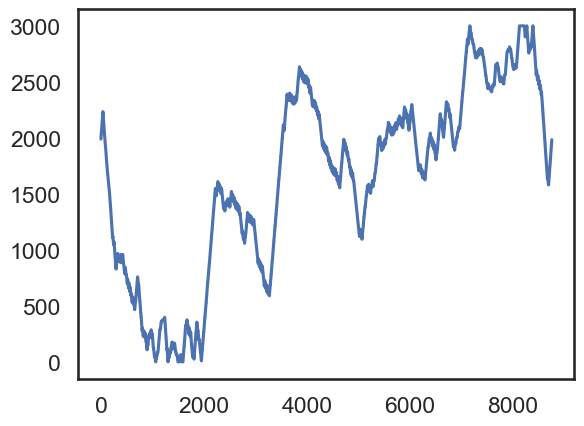

In [17]:
hourly_generation.hydrogen_charge.plot()

In [23]:
hourly_generation = pd.read_csv("eoles/outputs/1005_policies_exogenous_cc_pricefeedback/1005_124717_S2p_N1_restrictiongas_cc_pricefeedback/dataframes/hourly_generation_2050.csv", index_col=0)

plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=os.path.join("eoles/outputs/comparison/hourly_generation.png"), methane=False, y_max=180, y_min=-50)

<AxesSubplot:>

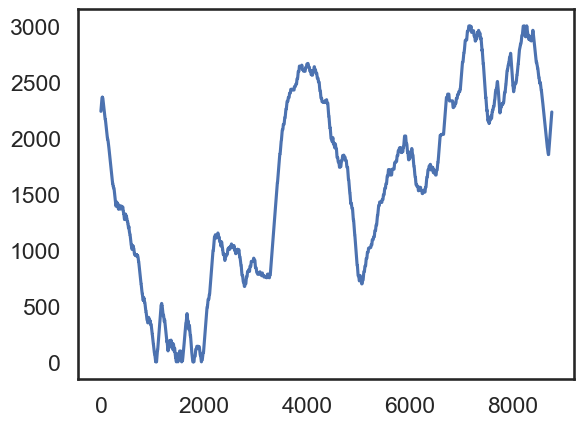

In [15]:
hourly_generation.hydrogen_charge.plot()

# Endogenous policies, final

## HC

AttributeError: 'NoneType' object has no attribute 'loc'

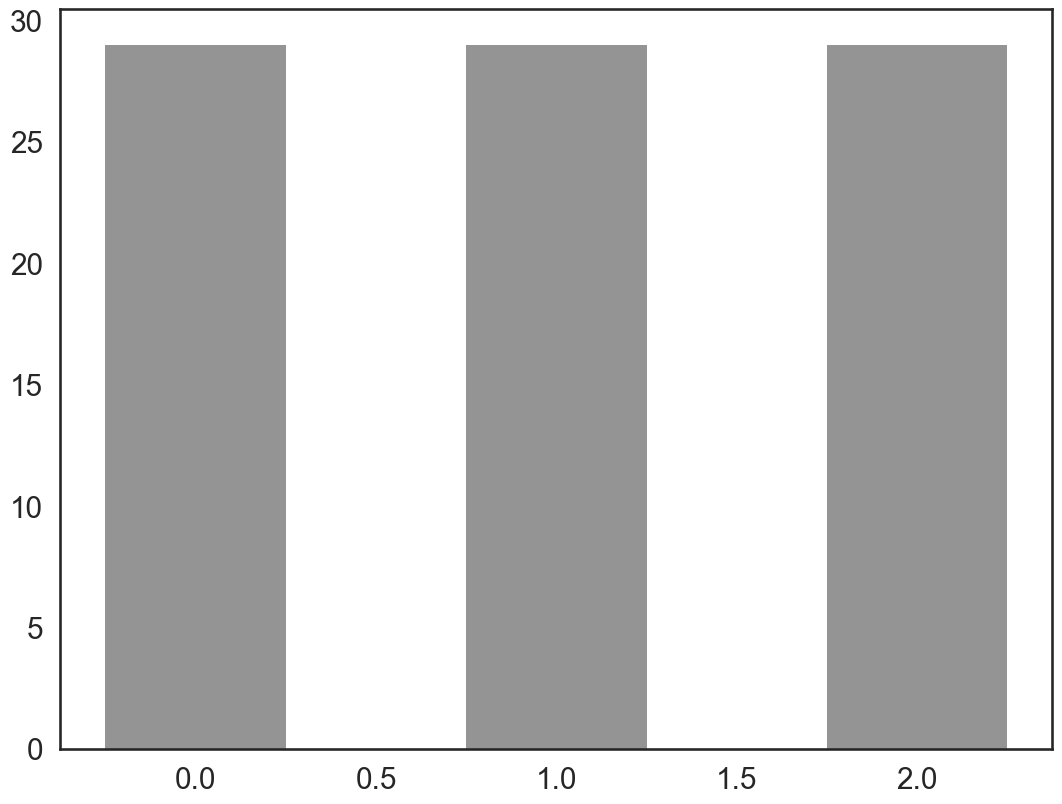

In [9]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=1.3)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_081327_centralized_insulation_S2p_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_183939_uniform_S2p_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190751_DR_S2p_N1_pricefeedback_hcDPE"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_173019_DR_FGE_S2p_N1_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_163302_proportional_S2p_N1_pricefeedback_hcDPE"),
    # },
    # 'S3 Opt': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1122_optim/1122_024103_centralized_insulation_S3_Opt_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1122_optim/1122_123623_uniform_S3_Opt_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1122_optim/1122_125227_DR_S3_Opt_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1122_optim/1122_124233_proportional_S3_Opt_hcDPE"),
    #  },
     '': {
       #  "Optimal": os.path.join("eoles/outputs/1122_optim/1122_063338_centralized_insulation_S3_N1_hcDPE"),
        "Uniform": os.path.join("eoles/outputs/1122_optim/1122_170038_uniform_S3_N1_hcDPE"),
        "Comprehensive": os.path.join("eoles/outputs/1122_optim/1122_164520_DR_S3_N1_hcDPE"),
         # "DR FGE": os.path.join("eoles/outputs/1122_optim/1122_164723_DR_FGE_S3_N1_hcDPE"),
        "Proportional": os.path.join("eoles/outputs/1122_optim/1122_165925_proportional_S3_N1_hcDPE"),
     },
    # 'S3 N1ren': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1122_optim/1122_011130_centralized_insulation_S3_N1ren_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1122_optim/1122_104034_uniform_S3_N1ren_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1122_optim/1122_111348_DR_S3_N1ren_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1122_optim/1122_112826_proportional_S3_N1ren_hcDPE"),
    #  },
    # 'S2 Opt': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_170354_centralized_insulation_S2_Opt_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_042530_uniform_S2_Opt_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_045542_DR_S2_Opt_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_043748_proportional_S2_Opt_pricefeedback_hcDPE"),
    #  },
    # 'S2 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1122_optim/1122_024754_centralized_insulation_S2_N1_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1122_optim/1122_113427_uniform_S2_N1_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1122_optim/1122_115222_DR_S2_N1_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1122_optim/1122_115005_proportional_S2_N1_hcDPE"),
    #  },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_085531_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
     #    "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190212_uniform_S3_N1nuc_pricefeedback_hcDPE"),
     #    "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190845_DR_S3_N1nuc_pricefeedback_hcDPE"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"].rename(columns={2049:2050})

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1122_optim_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Uniform", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=True, secondary_y=' Proportional',
    secondary_axis_spec={'y_min': 0, 'y_max': 120, 'title': 'Subsidies (€/MWh)'})

# # # Plots ResIRF
# # # Problem to solve
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True, reference=" Optimal")

In [39]:
sns.set_theme(context="talk", style="white")
hourly_generation = pd.read_csv("eoles/outputs/1122_optim/1122_063338_centralized_insulation_S3_N1_hcDPE/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006
date_start, date_end = datetime.datetime(2006, 7, 5, 0, 0), datetime.datetime(2006, 7, 12, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate,
                  save_path='eoles/outputs/images submission/typical_week_june.pdf',
                  methane=False,
                  y_max=120)

In [23]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_081327_centralized_insulation_S2p_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_183939_uniform_S2p_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190751_DR_S2p_N1_pricefeedback_hcDPE"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_173019_DR_FGE_S2p_N1_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_163302_proportional_S2p_N1_pricefeedback_hcDPE"),
    # },
    # 'S3 Opt': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_001641_centralized_insulation_S3_Opt_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_122513_uniform_S3_Opt_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_121810_DR_S3_Opt_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_115235_proportional_S3_Opt_pricefeedback_hcDPE"),
    #  },
     'S3 N1': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_210700_centralized_insulation_S3_N1_pricefeedback_hcDPE"),
        "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_080608_uniform_S3_N1_pricefeedback_hcDPE"),
        "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_082238_DR_S3_N1_pricefeedback_hcDPE"),
        "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_080031_proportional_S3_N1_pricefeedback_hcDPE"),
     },
    # 'S3 N1nuc': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_131007_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_213716_uniform_S3_N1nuc_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_220041_DR_S3_N1nuc_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_220629_proportional_S3_N1nuc_pricefeedback_hcDPE"),
    #  },
    # 'S2 Opt': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_170354_centralized_insulation_S2_Opt_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_042530_uniform_S2_Opt_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_045542_DR_S2_Opt_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_043748_proportional_S2_Opt_pricefeedback_hcDPE"),
    #  },
    # 'S2 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_133338_centralized_insulation_S2_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_221705_uniform_S2_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_224119_DR_S2_N1_pricefeedback_hcDPE"),
    #     #  "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/prop"),
    #  },
    #  'S3 N1ren': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_103607_centralized_insulation_S3_N1ren_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_174849_uniform_S3_N1ren_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_173826_DR_S3_N1ren_pricefeedback_hcDPE"),
    #      "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_175407_proportional_S3_N1ren_pricefeedback_hcDPE"),
    #  }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1110_optim_pricesfeedback_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
results_resirf["Reference"] = results_resirf.pop("S3 N1 Insulation Technical Optimum")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

KeyError: "['Emission saving natural replacement (MtCO2/year)'] not in index"

## No HC

In [24]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_081327_centralized_insulation_S2p_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_183939_uniform_S2p_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190751_DR_S2p_N1_pricefeedback_hcDPE"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_173019_DR_FGE_S2p_N1_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_163302_proportional_S2p_N1_pricefeedback_hcDPE"),
    # },
    # 'S3 Opt': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1116_103745_centralized_insulation_S3_Opt_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1116_195536_uniform_S3_Opt_pricefeedback_noHC"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1116_195427_DR_S3_Opt_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1116_194044_proportional_S3_Opt_pricefeedback_noHC"),
    #  },
    # 'S3 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1114_120429_centralized_insulation_S3_N1_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1114_205503_uniform_S3_N1_pricefeedback_noHC"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1114_205029_DR_S3_N1_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1114_205359_proportional_S3_N1_pricefeedback_noHC"),
    #  },
     '': {
        "Optimal": os.path.join("eoles/outputs/1122_optim_noHC/1128_125741_centralized_insulation_S3_N1_noHC"),
        "Uniform": os.path.join("eoles/outputs/1122_optim_noHC/1128_220726_uniform_S3_N1_noHC"),
        "Comprehensive": os.path.join("eoles/outputs/1122_optim_noHC/1128_220606_DR_S3_N1_noHC"),
         # "DR FGE": os.path.join("eoles/outputs/1122_optim/1122_164723_DR_FGE_S3_N1_hcDPE"),
        "Proportional": os.path.join("eoles/outputs/1122_optim_noHC/1128_213342_proportional_S3_N1_noHC"),
     },
    # 'S3 N1nuc': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_131007_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_213716_uniform_S3_N1nuc_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_220041_DR_S3_N1nuc_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_220629_proportional_S3_N1nuc_pricefeedback_hcDPE"),
    #  },
    # 'S2 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_133338_centralized_insulation_S2_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_221705_uniform_S2_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_224119_DR_S2_N1_pricefeedback_hcDPE"),
    #     #  "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/prop"),
    #  },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_085531_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
     #    "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190212_uniform_S3_N1nuc_pricefeedback_hcDPE"),
     #    "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190845_DR_S3_N1nuc_pricefeedback_hcDPE"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1122_optim_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Optimal", greenfield=False, health=False, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True, reference=" Optimal")

Problem Energy expenditure
break
break


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1280x960 with 0 Axes>

## Supply side assumptions

AttributeError: 'NoneType' object has no attribute 'loc'

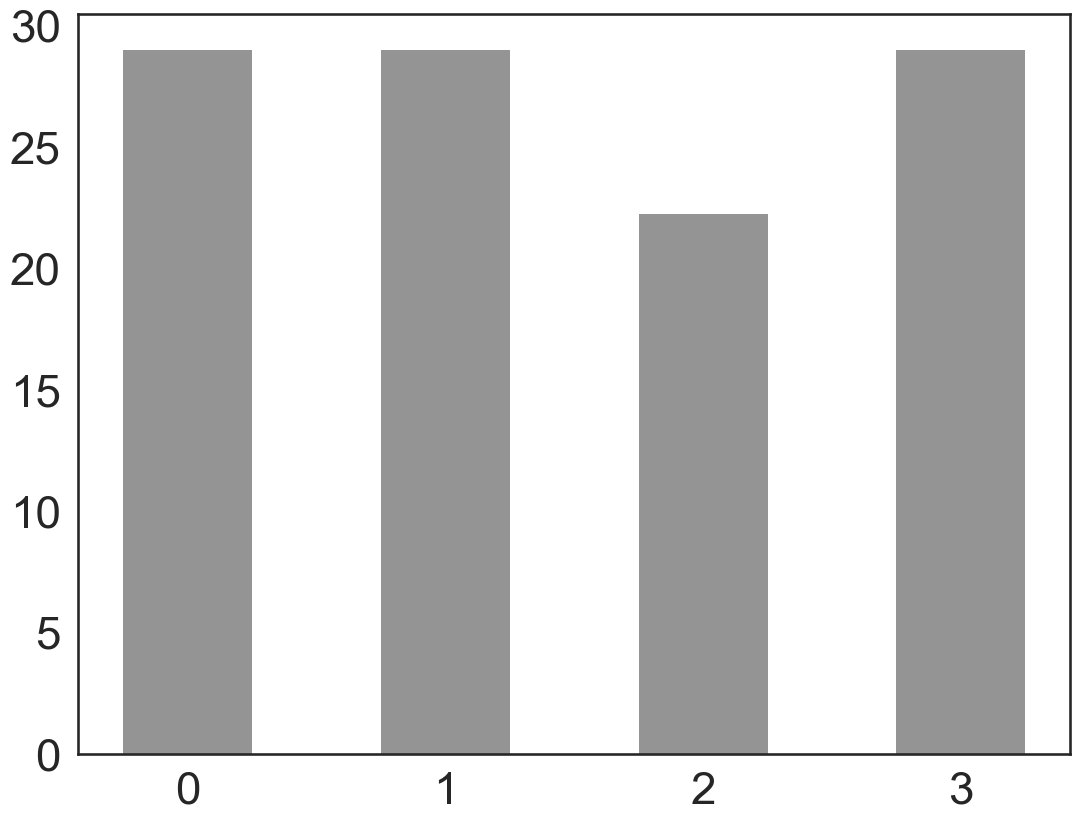

In [10]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # '': {
    #     "Reference": os.path.join("eoles/outputs/1122_optim/1122_063338_centralized_insulation_S3_N1_hcDPE"),
    #     "Biogas-": os.path.join("eoles/outputs/1122_optim/1122_024754_centralized_insulation_S2_N1_hcDPE"),
    #     # "S2 N1nuc": os.path.join("eoles/outputs/1122_optim/1123_045242_centralized_insulation_S2_N1nuc_hcDPE"),
    #     "Nuclear-": os.path.join("eoles/outputs/1122_optim/1122_053118_centralized_insulation_S3_N1nuc_hcDPE"),
    #     # "Renewable-": os.path.join("eoles/outputs/1122_optim/1122_011130_centralized_insulation_S3_N1ren_hcDPE"),
    #     "Renewable-": os.path.join("eoles/outputs/1122_optim/1128_103439_centralized_insulation_S3_N1ren2_hcDPE"),
    #     # "S3 Opt": os.path.join("eoles/outputs/1122_optim/1122_024103_centralized_insulation_S3_Opt_hcDPE"),
    #     # "S2 Opt": os.path.join("eoles/outputs/1122_optim/1123_042009_centralized_insulation_S2_Opt_hcDPE"),
    #  },
    '': {
        "Reference": os.path.join("eoles/outputs/1122_optim/1122_170038_uniform_S3_N1_hcDPE"),
        "Biogas-": os.path.join("eoles/outputs/1122_optim/1122_113427_uniform_S2_N1_hcDPE"),
        # "S2 N1nuc": os.path.join("eoles/outputs/1122_optim/1123_210114_uniform_S2_N1nuc_hcDPE"),
        "Nuclear-": os.path.join("eoles/outputs/1122_optim/1122_165554_uniform_S3_N1nuc_hcDPE"),
        # "Renewable-": os.path.join("eoles/outputs/1122_optim/1122_104034_uniform_S3_N1ren_hcDPE"),
        "Renewable-": os.path.join("eoles/outputs/1122_optim/1128_193548_uniform_S3_N1ren2_hcDPE"),
        # "S3 Opt": os.path.join("eoles/outputs/1122_optim/1122_123623_uniform_S3_Opt_hcDPE"),
        # "S2 Opt": os.path.join("eoles/outputs/1122_optim/1123_213523_uniform_S2_Opt_hcDPE"),
     },
     #        '': {
     #    "Reference": os.path.join("eoles/outputs/1122_optim/1122_165925_proportional_S3_N1_hcDPE"),
     #    "Biogas-": os.path.join("eoles/outputs/1122_optim/1122_115005_proportional_S2_N1_hcDPE"),
     #    # "S2 N1nuc": os.path.join("eoles/outputs/1122_optim/1123_215214_proportional_S2_N1nuc_hcDPE"),
     #    "Nuclear-": os.path.join("eoles/outputs/1122_optim/1122_171147_proportional_S3_N1nuc_hcDPE"),
     #    # "Renewable-": os.path.join("eoles/outputs/1122_optim/1122_112826_proportional_S3_N1ren_hcDPE"),
     #    "Renewable-": os.path.join("eoles/outputs/1122_optim/1128_192422_proportional_S3_N1ren2_hcDPE"),
     #    # "S3 Opt": os.path.join("eoles/outputs/1122_optim/1122_124233_proportional_S3_Opt_hcDPE"),
     #    # "S2 Opt": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_043748_proportional_S2_Opt_pricefeedback_hcDPE"),
     # }
    # '': {
    #     "Reference": os.path.join("eoles/outputs/1122_optim/1122_164520_DR_S3_N1_hcDPE"),
    #     "Biogas-": os.path.join("eoles/outputs/1122_optim/1122_115222_DR_S2_N1_hcDPE"),
    #     # "S2 N1nuc": os.path.join("eoles/outputs/1122_optim/1123_212741_DR_S2_N1nuc_hcDPE"),
    #     "Nuclear-": os.path.join("eoles/outputs/1122_optim/1122_170343_DR_S3_N1nuc_hcDPE"),
    #     # "Renewable-": os.path.join("eoles/outputs/1122_optim/1122_111348_DR_S3_N1ren_hcDPE"),
    #     "Renewable-": os.path.join("eoles/outputs/1122_optim/1128_194759_DR_S3_N1ren2_hcDPE"),
    #     # "S3 Opt": os.path.join("eoles/outputs/1122_optim/1122_125227_DR_S3_Opt_hcDPE"),
    #     # "S2 Opt": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_045542_DR_S2_Opt_pricefeedback_hcDPE"),
    #  }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1122_optim_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, y_max=30, x_min=0, x_max=40, rotation=90, smallest_size=100, biggest_size=600, fontsize=20, pdf=True, remove_legend=True, s_min=1000, s_max=1250,
coordinates=     {
    " Reference": (-60, -30),
    "Biogas-": (20, -5),
    " Nuclear-": (-60, 20),
    " Renewable-": (15, -5)
})

# # # Plots ResIRF
# # # Problem to solve
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

    ### Saving coordinates for supply

In [ ]:
coordinates = {
    'Proportional': {
    "Reference": (20, -5),
    "Biogas-": (20, -5),
    " Nuclear-": (20, -5),
    " Renewable-": (-130, -5)
},
    'Optimal': {
    " Reference": (-120, -20),
    "Biogas-": (20, -5),
    " Nuclear-": (-100, 10),
    " Renewable-": (-60, -30)
},
    'Comprehensive': {
    " Reference": (-120, -20),
    "Biogas-": (20, -5),
    " Nuclear-": (-100, 10),
    " Renewable-": (20, -5)
},
'Uniform':
    {
    " Reference": (-60, -30),
    "Biogas-": (20, -5),
    " Nuclear-": (-60, 20),
    " Renewable-": (15, -5)
}
}

In [2]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_081327_centralized_insulation_S2p_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_183939_uniform_S2p_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190751_DR_S2p_N1_pricefeedback_hcDPE"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_173019_DR_FGE_S2p_N1_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_163302_proportional_S2p_N1_pricefeedback_hcDPE"),
    # },
    # 'S3 Opt': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_001641_centralized_insulation_S3_Opt_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_122513_uniform_S3_Opt_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_121810_DR_S3_Opt_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_115235_proportional_S3_Opt_pricefeedback_hcDPE"),
    #  },
    #  'S3 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_210700_centralized_insulation_S3_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_080608_uniform_S3_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_082238_DR_S3_N1_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_080031_proportional_S3_N1_pricefeedback_hcDPE"),
    #  },
    # 'S3 N1nuc': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_131007_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_213716_uniform_S3_N1nuc_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_220041_DR_S3_N1nuc_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_220629_proportional_S3_N1nuc_pricefeedback_hcDPE"),
    #  },
    # 'S2 Opt': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_170354_centralized_insulation_S2_Opt_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_042530_uniform_S2_Opt_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_045542_DR_S2_Opt_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_043748_proportional_S2_Opt_pricefeedback_hcDPE"),
    #  },
    '': {
        "S3 N1": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_210700_centralized_insulation_S3_N1_pricefeedback_hcDPE"),
        "S2 N1": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_133338_centralized_insulation_S2_N1_pricefeedback_hcDPE"),
        "S2 N1nuc": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_173206_centralized_insulation_S2_N1nuc_pricefeedback_hcDPE"),
        "S3 N1nuc": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_131007_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
        "S3 N1ren": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_103607_centralized_insulation_S3_N1ren_pricefeedback_hcDPE"),
        "S3 Opt": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_001641_centralized_insulation_S3_Opt_pricefeedback_hcDPE"),
        #  "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/prop"),
     },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_085531_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
     #    "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190212_uniform_S3_N1nuc_pricefeedback_hcDPE"),
     #    "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190845_DR_S3_N1nuc_pricefeedback_hcDPE"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1110_optim_pricesfeedback_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="S3 N1", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
results_resirf["Reference"] = results_resirf.pop("S3 N1 Insulation Technical Optimum")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

KeyError: 'S3 N1 Insulation Technical Optimum'

## Carbon budget

In [6]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_081327_centralized_insulation_S2p_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_183939_uniform_S2p_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190751_DR_S2p_N1_pricefeedback_hcDPE"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_173019_DR_FGE_S2p_N1_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_163302_proportional_S2p_N1_pricefeedback_hcDPE"),
    # },
    # 'S3 Opt': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1116_103745_centralized_insulation_S3_Opt_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1116_195536_uniform_S3_Opt_pricefeedback_noHC"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1116_195427_DR_S3_Opt_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_noHC_pricefeedback/1116_194044_proportional_S3_Opt_pricefeedback_noHC"),
    #  },
    'S2 N1': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback_cb/1115_213808_centralized_insulation_S2_N1_hcDPE_pricefeedback_cbconvex"),
        "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback_cb/1116_044725_uniform_S2_N1_hcDPE_pricefeedback_cbconvex"),
        "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback_cb/1116_041633_DR_S2_N1_hcDPE_pricefeedback_cbconvex"),
        "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback_cb/1116_045739_proportional_S2_N1_hcDPE_pricefeedback_cbconvex"),
     },
    # 'S3 N1nuc': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_131007_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_213716_uniform_S3_N1nuc_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_220041_DR_S3_N1nuc_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1114_220629_proportional_S3_N1nuc_pricefeedback_hcDPE"),
    #  },
    # 'S2 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_133338_centralized_insulation_S2_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_221705_uniform_S2_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1110_224119_DR_S2_N1_pricefeedback_hcDPE"),
    #     #  "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/prop"),
    #  },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_085531_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
     #    "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190212_uniform_S3_N1nuc_pricefeedback_hcDPE"),
     #    "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190845_DR_S3_N1nuc_pricefeedback_hcDPE"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1110_optim_pricesfeedback_hcDPE_cb")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
results_resirf["Reference"] = results_resirf.pop("S3 N1 Insulation Technical Optimum")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

KeyError: 'S3 N1 Insulation Technical Optimum'

# Endogenous policies

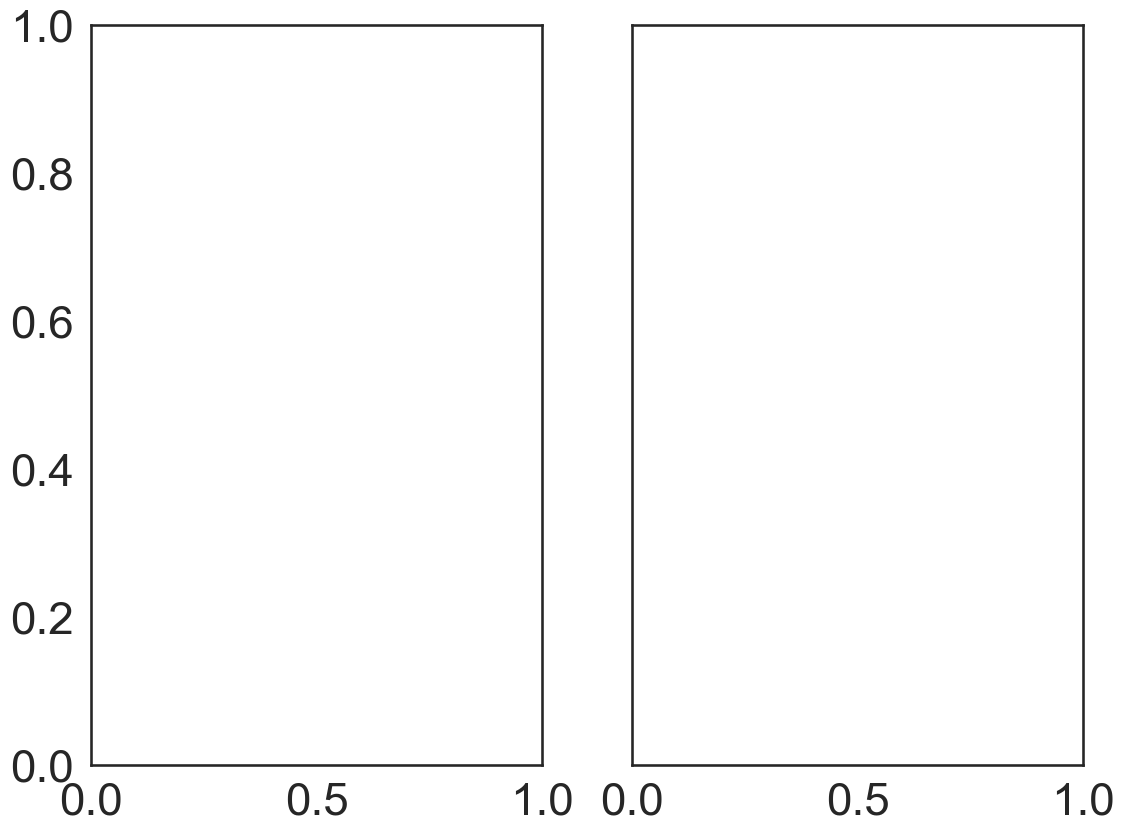

In [18]:
# 1015 : with price feedback, no health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
     '': {
        "New HC": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_045146_centralized_insulation_S3_N1_pricefeedback"),
        "Old HC": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_085806_centralized_insulation_S3_N1_pricefeedback_hcDPE"),
     },
         'Uniform': {
        "New HC": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_144041_uniform_S3_N1_pricefeedback"),
        "Old HC": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_184501_uniform_S3_N1_pricefeedback_hcDPE"),
     }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1030_test")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="New HC", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

## No HC

In [13]:
# 1015 : with price feedback, no health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_001252_centralized_insulation_S2p_N1_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_104601_uniform_S2p_N1_pricefeedback_noHC"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_103641_DR_S2p_N1_pricefeedback_noHC"),
    # },
     '': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1028_235251_centralized_insulation_S3_N1_pricefeedback_noHC"),
        "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_101517_uniform_S3_N1_pricefeedback_noHC"),
        "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_095601_DR_S3_N1_pricefeedback_noHC"),
     },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_005645_centralized_insulation_S3_N1nuc_pricefeedback_noHC"),
     #    "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_101547_uniform_S3_N1nuc_pricefeedback_noHC"),
     #    "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_101846_DR_S3_N1nuc_pricefeedback_noHC"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1015_optim_pricesfeedback_noHC")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=False, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [81]:
# 1030 : with price feedback, no health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S3 Opt': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1101_065720_centralized_insulation_S3_Opt_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1101_181450_uniform_S3_Opt_pricefeedback_noHC"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1101_185328_DR_FGE_S3_Opt_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1101_183212_proportional_S3_Opt_pricefeedback_noHC"),
    # },
    #  'S3 N1ren': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1101_070432_centralized_insulation_S3_N1ren_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1101_171008_uniform_S3_N1ren_pricefeedback_noHC"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1101_172612_DR_FGE_S3_N1ren_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1101_170923_proportional_S3_N1ren_pricefeedback_noHC"),
    # },
    # 'S3 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1028_235251_centralized_insulation_S3_N1_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_101517_uniform_S3_N1_pricefeedback_noHC"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_095601_DR_S3_N1_pricefeedback_noHC"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1105_044641_DR_FGE_S3_N1_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1105_035005_proportional_S3_N1_pricefeedback_noHC"),
    # },
    'S3 N1': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_004115_centralized_insulation_S3_N1_pricefeedback_noHC 2.36.39 PM"),
        "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_134717_uniform_S3_N1_pricefeedback_noHC"),
        "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_135202_DR_S3_N1_pricefeedback_noHC"),
        "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_135824_DR_FGE_S3_N1_pricefeedback_noHC"),
        "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_135355_proportional_S3_N1_pricefeedback_noHC"),
    }
    # 'S2 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1103_202624_centralized_insulation_S2_N1_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1104_120246_uniform_S2_N1_pricefeedback_noHC"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1104_121931_DR_S2_N1_pricefeedback_noHC"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1104_121341_DR_FGE_S2_N1_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1104_122319_proportional_S2_N1_pricefeedback_noHC"),
    # },
    # 'S2 N1ren': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1103_202624_centralized_insulation_S2_N1_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1104_102857_uniform_S2_N1ren_pricefeedback_noHC"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1104_103140_DR_S2_N1ren_pricefeedback_noHC"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1104_103711_DR_FGE_S2_N1ren_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1104_092226_proportional_S2_N1ren_pricefeedback_noHC"),
    # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1031_optim_pricesfeedback_noHC")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=False, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

## Old HC

In [4]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_081327_centralized_insulation_S2p_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_183939_uniform_S2p_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190751_DR_S2p_N1_pricefeedback_hcDPE"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_173019_DR_FGE_S2p_N1_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_163302_proportional_S2p_N1_pricefeedback_hcDPE"),
    # },
     'S3 N1': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1110_optim_pricefeedback/1111_210700_centralized_insulation_S3_N1_pricefeedback_hcDPE"),
        "Uniform": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_080608_uniform_S3_N1_pricefeedback_hcDPE"),
        "DR": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_082238_DR_S3_N1_pricefeedback_hcDPE"),
        # "DR FGE": os.path.join("eoles/outputs/1110_optim_pricefeedback/1108_172734_DR_FGE_S3_N1_pricefeedback_hcDPE"),
        "Proportional": os.path.join("eoles/outputs/1110_optim_pricefeedback/1112_080031_proportional_S3_N1_pricefeedback_hcDPE"),
     },
    # 'S2 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1107_221618_centralized_insulation_S2_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_084416_uniform_S2_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_090629_DR_S2_N1_pricefeedback_hcDPE"),
    #      "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_091805_DR_FGE_S2_N1_pricefeedback_hcDPE"),
    #      "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_092031_proportional_S2_N1_pricefeedback_hcDPE"),
    #  },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_085531_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
     #    "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190212_uniform_S3_N1nuc_pricefeedback_hcDPE"),
     #    "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190845_DR_S3_N1nuc_pricefeedback_hcDPE"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1110_optim_pricesfeedback_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
results_resirf["Reference"] = results_resirf.pop("S3 N1 Insulation Technical Optimum")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

KeyError: 'Reference'

In [3]:
# 1015 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_081327_centralized_insulation_S2p_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_183939_uniform_S2p_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190751_DR_S2p_N1_pricefeedback_hcDPE"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_173019_DR_FGE_S2p_N1_pricefeedback_hcDPE"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_163302_proportional_S2p_N1_pricefeedback_hcDPE"),
    # },
     'S3 N1': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_085806_centralized_insulation_S3_N1_pricefeedback_hcDPE"),
        "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_184501_uniform_S3_N1_pricefeedback_hcDPE"),
        "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_184237_DR_S3_N1_pricefeedback_hcDPE"),
        "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_172734_DR_FGE_S3_N1_pricefeedback_hcDPE"),
        "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_170317_proportional_S3_N1_pricefeedback_hcDPE"),
     },
    # 'S2 N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1107_221618_centralized_insulation_S2_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_084416_uniform_S2_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_090629_DR_S2_N1_pricefeedback_hcDPE"),
    #      "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_091805_DR_FGE_S2_N1_pricefeedback_hcDPE"),
    #      "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_092031_proportional_S2_N1_pricefeedback_hcDPE"),
    #  },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_085531_centralized_insulation_S3_N1nuc_pricefeedback_hcDPE"),
     #    "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190212_uniform_S3_N1nuc_pricefeedback_hcDPE"),
     #    "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_hcDPE/1015_190845_DR_S3_N1nuc_pricefeedback_hcDPE"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1015_optim_pricesfeedback_hcDPE")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
results_resirf["Reference"] = results_resirf.pop("S2 N1 Insulation Technical Optimum")
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

KeyError: 'S2 N1 Insulation Technical Optimum'

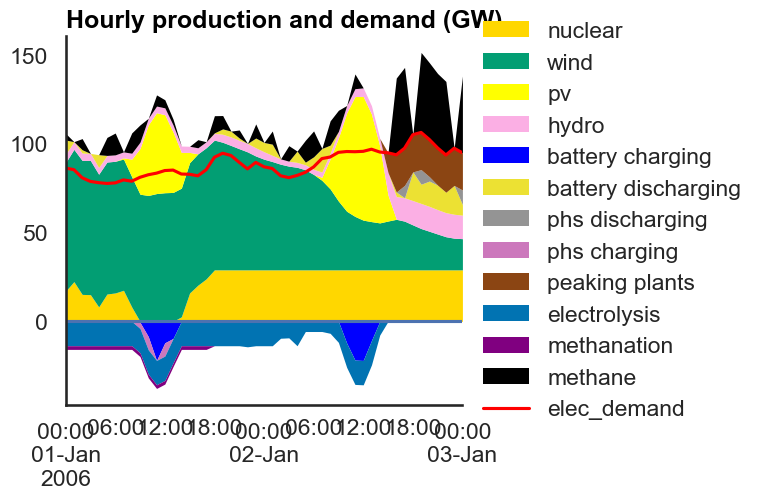

In [63]:
sns.set_theme(context="talk", style="white")
hourly_generation = pd.read_csv("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_090629_DR_S2_N1_pricefeedback_hcDPE/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006
date_start, date_end = datetime.datetime(2006, 1, 1, 0, 0), datetime.datetime(2006, 1, 3, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=True)

In [55]:
hourly_generation.loc[hourly_generation.battery4_charge == hourly_generation.battery4_charge.max()]

,hour,demand,offshore_f,offshore_g,onshore,pv_g,pv_c,river,lake,methanization,...,CH4_demand,H2_demand,heat_elec,heat_gas,electrolysis_elec,methanation_elec,carbon_content,carbon_content_heat,date,date_only
14,14,NaN,29.008875,12.526329,30.880471,12.063453,8.042302,3.612465,0.0,3.99589,...,7.392253,4.56621,15.280124,7.392253,13.707763,2.063521,0.000000,0.000000,2006-01-01 14:00:00,2006-01-01
15,15,NaN,29.099175,12.681514,31.528269,3.458145,2.305430,3.462226,0.0,3.99589,...,8.131479,4.56621,16.808136,8.131479,13.707763,2.063521,0.000000,0.000000,2006-01-01 15:00:00,2006-01-01
16,16,NaN,29.054025,12.817029,32.038524,0.000658,0.000439,3.409257,0.0,3.99589,...,9.117113,4.56621,18.845486,9.117113,13.707763,2.063521,0.000000,0.000000,2006-01-01 16:00:00,2006-01-01
17,17,NaN,28.873425,12.867300,32.068177,0.000000,0.000000,3.368809,0.0,3.99589,...,10.349155,4.56621,21.392173,10.349155,13.707763,2.063521,0.000000,0.000000,2006-01-01 17:00:00,2006-01-01
18,18,NaN,28.655200,12.788614,31.577554,0.000000,0.000000,3.819524,0.0,3.99589,...,11.334789,4.56621,23.429523,11.334789,13.707763,0.000000,0.000000,0.000000,2006-01-01 18:00:00,2006-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,8561,NaN,6.787550,5.894871,14.206974,0.000000,0.000000,2.891127,8.8,3.99589,...,12.681228,4.56621,28.178698,12.681228,0.000000,0.000000,0.027046,0.000012,2006-12-23 17:00:00,2006-12-23
8584,8584,NaN,6.810125,3.470914,9.395651,0.071765,0.047843,1.839458,8.8,3.99589,...,11.712076,4.56621,26.488391,11.712076,0.000000,0.000000,0.027647,0.000011,2006-12-24 16:00:00,2006-12-24
8607,8607,NaN,5.734050,1.794471,6.951843,13.540953,9.027302,1.816344,8.8,3.99589,...,10.672663,4.56621,24.328507,10.672663,0.000000,0.000000,0.024744,0.000009,2006-12-25 15:00:00,2006-12-25
8631,8631,NaN,1.888775,0.948600,3.687029,13.764999,9.176666,1.795157,8.8,3.99589,...,10.588243,4.56621,24.081858,10.588243,0.000000,0.000000,0.024741,0.000009,2006-12-26 15:00:00,2006-12-26


<AxesSubplot:>

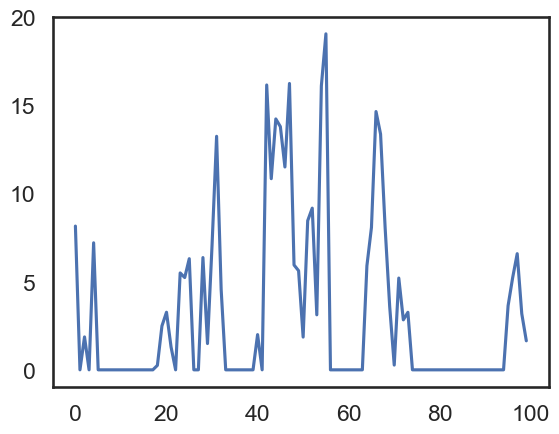

In [64]:
hourly_generation.battery4.iloc[0:100].plot()

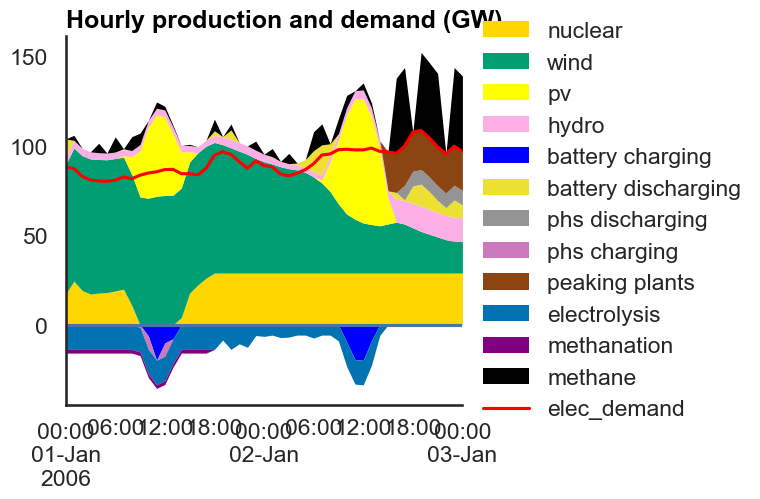

In [69]:
sns.set_theme(context="talk", style="white")
hourly_generation = pd.read_csv("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_084416_uniform_S2_N1_pricefeedback_hcDPE/dataframes/hourly_generation_2050.csv", index_col=0)
# hourly_generation = pd.read_csv("eoles/outputs/1015_optim_pricefeedback_hcDPE/1108_090629_DR_S2_N1_pricefeedback_hcDPE/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 1, 1, 0, 0), datetime.datetime(2006, 1, 3, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=True)

(-1.0, 170.0)

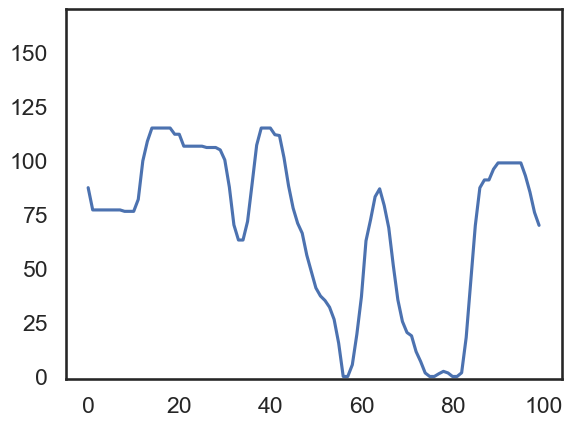

In [70]:
hourly_generation.battery4_charge.iloc[0:100].plot()
plt.ylim(-1,170)

In [57]:
hourly_generation.loc[hourly_generation.battery4_charge == hourly_generation.battery4_charge.max()]

,hour,demand,offshore_f,offshore_g,onshore,pv_g,pv_c,river,lake,methanization,...,CH4_demand,H2_demand,heat_elec,heat_gas,electrolysis_elec,methanation_elec,carbon_content,carbon_content_heat,date,date_only
14,14,NaN,29.008875,12.526329,30.880471,12.063453,8.042302,3.612465,0.000000,3.99589,...,4.963457,4.56621,16.892776,4.963457,13.707763,2.06829,0.000000,0.000000,2006-01-01 14:00:00,2006-01-01
15,15,NaN,29.099175,12.681514,31.528269,3.458145,2.305430,3.462226,0.000000,3.99589,...,5.459803,4.56621,18.582054,5.459803,13.707763,2.06829,0.000000,0.000000,2006-01-01 15:00:00,2006-01-01
16,16,NaN,29.054025,12.817029,32.038524,0.000658,0.000439,3.409257,0.000000,3.99589,...,6.121597,4.56621,20.834424,6.121597,13.707763,2.06829,0.000000,0.000000,2006-01-01 16:00:00,2006-01-01
17,17,NaN,28.873425,12.867300,32.068177,0.000000,0.000000,3.368809,0.000000,3.99589,...,6.948840,4.56621,23.649887,6.948840,13.707763,2.06829,0.000000,0.000000,2006-01-01 17:00:00,2006-01-01
18,18,NaN,28.655200,12.788614,31.577554,0.000000,0.000000,3.819524,0.000000,3.99589,...,7.610634,4.56621,25.902257,7.610634,13.707763,0.00000,0.000000,0.000000,2006-01-01 18:00:00,2006-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8655,8655,NaN,9.436350,4.760486,7.293013,12.876225,8.584150,1.684404,4.087605,3.99589,...,6.824648,4.56621,25.190345,6.824648,0.000000,0.00000,0.025717,0.000009,2006-12-27 15:00:00,2006-12-27
8656,8656,NaN,9.850225,5.232600,8.510012,0.075778,0.050519,1.838495,8.800000,3.99589,...,7.651878,4.56621,28.243721,7.651878,0.000000,0.00000,0.025744,0.000010,2006-12-27 16:00:00,2006-12-27
8679,8679,NaN,11.054225,4.683986,8.413409,13.913410,9.275607,2.103338,0.000000,3.99589,...,6.643675,4.56621,24.284935,6.643675,0.000000,0.00000,0.014286,0.000005,2006-12-28 15:00:00,2006-12-28
8727,8727,NaN,24.651900,14.366700,47.175925,7.878407,5.252272,1.713296,0.000000,3.99589,...,4.357654,4.56621,13.903922,4.357654,13.707763,2.06829,0.000000,0.000000,2006-12-30 15:00:00,2006-12-30


In [18]:
# 1015 : with price feedback, new health costs
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_081327_centralized_insulation_S2p_N1_pricefeedback_hcDPE"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_183939_uniform_S2p_N1_pricefeedback_hcDPE"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_190751_DR_S2p_N1_pricefeedback_hcDPE"),
    # },
    #  '': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_045146_centralized_insulation_S3_N1_pricefeedback"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_144041_uniform_S3_N1_pricefeedback"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_140727_DR_S3_N1_pricefeedback"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback/1105_151416_DR_FGE_S3_N1_pricefeedback"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback/1105_153045_proportional_S3_N1_pricefeedback"),
    #  },
    'S2 N1': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback/1104_221405_centralized_insulation_S2_N1_pricefeedback"),
        "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback/1105_094543_uniform_S2_N1_pricefeedback"),
        "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback/1105_102325_DR_S2_N1_pricefeedback"),
        "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback/1105_102042_DR_FGE_S2_N1_pricefeedback"),
        "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback/1105_095643_proportional_S2_N1_pricefeedback"),
     }
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_045550_centralized_insulation_S3_N1nuc_pricefeedback"),
     #    "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_144935_uniform_S3_N1nuc_pricefeedback"),
     #    "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_142415_DR_S3_N1nuc_pricefeedback"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1015_optim_pricesfeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

## Comparison new config EOLES

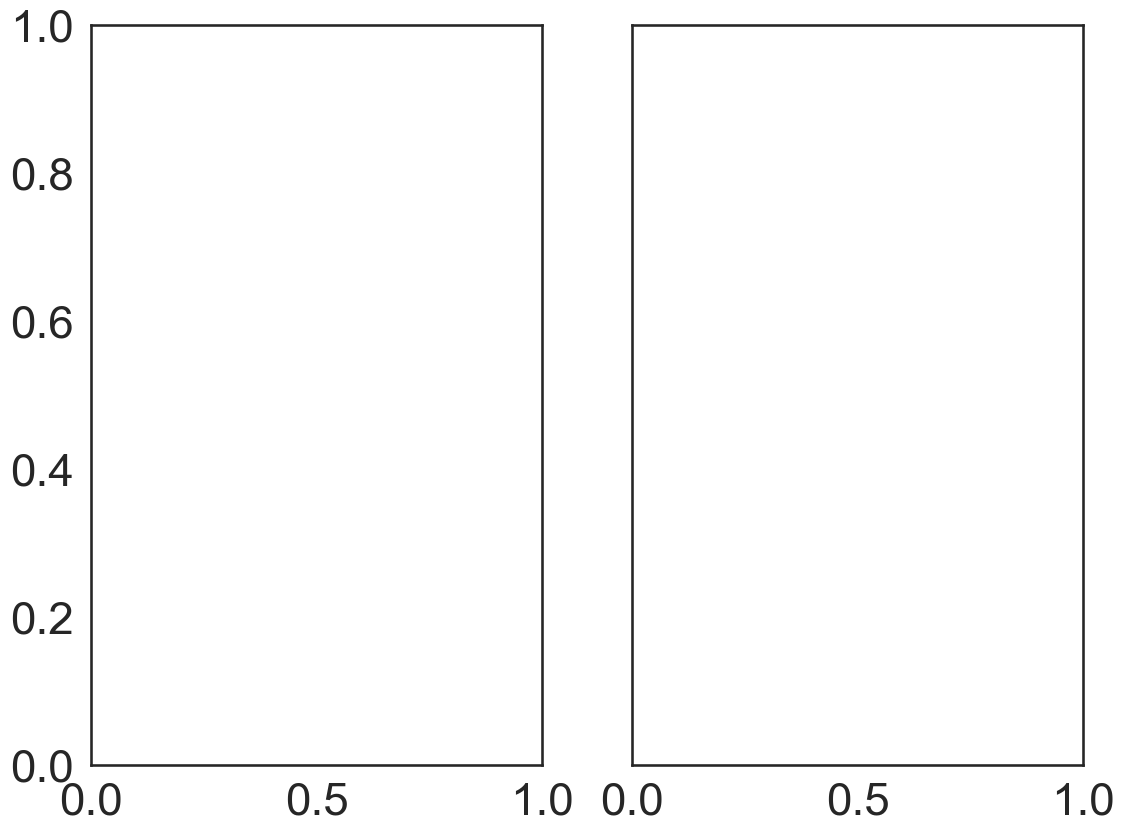

In [78]:
# COMPARISON WITH NEW FRAMEWORK EOLES
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
     'S3 N1 old': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_045146_centralized_insulation_S3_N1_pricefeedback"),
        "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_144041_uniform_S3_N1_pricefeedback"),
        "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback/1015_140727_DR_S3_N1_pricefeedback"),
        "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback/1105_151416_DR_FGE_S3_N1_pricefeedback"),
        "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback/1105_153045_proportional_S3_N1_pricefeedback"),
     },
    'S3 N1 new': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1108_optim_pricefeedback_newframework/1107_211126_centralized_insulation_S3_N1_pricefeedback"),
        "Uniform": os.path.join("eoles/outputs/1108_optim_pricefeedback_newframework/1108_095937_uniform_S3_N1_pricefeedback"),
        "DR": os.path.join("eoles/outputs/1108_optim_pricefeedback_newframework/1108_094423_DR_S3_N1_pricefeedback"),
        "DR FGE": os.path.join("eoles/outputs/1108_optim_pricefeedback_newframework/1108_095238_DR_FGE_S3_N1_pricefeedback"),
        "Proportional": os.path.join("eoles/outputs/1108_optim_pricefeedback_newframework/1108_095316_proportional_S3_N1_pricefeedback"),
     },
    # 'S3 N1 noHC old': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1028_235251_centralized_insulation_S3_N1_pricefeedback_noHC"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_101517_uniform_S3_N1_pricefeedback_noHC"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1029_095601_DR_S3_N1_pricefeedback_noHC"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1105_044641_DR_FGE_S3_N1_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1105_035005_proportional_S3_N1_pricefeedback_noHC"),
    # },
    # 'S3 N1 noHC new': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_004115_centralized_insulation_S3_N1_pricefeedback_noHC 2.36.39 PM"),
    #     "Uniform": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_134717_uniform_S3_N1_pricefeedback_noHC"),
    #     "DR": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_135202_DR_S3_N1_pricefeedback_noHC"),
    #     "DR FGE": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_135824_DR_FGE_S3_N1_pricefeedback_noHC"),
    #     "Proportional": os.path.join("eoles/outputs/1015_optim_pricefeedback_noHC/1108_135355_proportional_S3_N1_pricefeedback_noHC"),
    # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1108_modif_EOLES")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [18]:
# NEW : with price evolution
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim/1006_023053_centralized_insulation_S2p_N1"),
    #     "Uniform": os.path.join("eoles/outputs/1006_optim/1006_131656_uniform_S2p_N1"),
    #     "DR": os.path.join("eoles/outputs/1006_optim/1006_125745_DR_S2p_N1"),
    # },
     '': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim/1006_015322_centralized_insulation_S3_N1"),
        "Uniform": os.path.join("eoles/outputs/1006_optim/1006_123757_uniform_S3_N1"),
        "DR": os.path.join("eoles/outputs/1006_optim/1006_122937_DR_S3_N1"),
     },
    #  'S3 N1nuc': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim/1006_030045_centralized_insulation_S3_N1nuc"),
    #     "Uniform": os.path.join("eoles/outputs/1006_optim/1006_130109_uniform_S3_N1nuc"),
    #     "DR": os.path.join("eoles/outputs/1006_optim/1006_130634_DR_S3_N1nuc"),
    #  }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1006_optim")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Uniform", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [3]:
# NEW : with price constant
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_024851_centralized_insulation_S2p_N1_pricesconstant"),
    #     "Uniform": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_140534_uniform_S2p_N1_pricesconstant"),
    #     "DR": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_132733_DR_S2p_N1_pricesconstant"),
    # },
     '': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_031337_centralized_insulation_S3_N1_pricesconstant"),
        "Uniform": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_134810_uniform_S3_N1_pricesconstant"),
        "DR": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_135750_DR_S3_N1_pricesconstant"),
     },
     # 'S3 N1nuc': {
     #    "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_025135_centralized_insulation_S3_N1nuc_pricesconstant"),
     #    "Uniform": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_133621_uniform_S3_N1nuc_pricesconstant"),
     #    "DR": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_134154_DR_S3_N1nuc_pricesconstant"),
     # }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1006_optim_pricesconstant")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Uniform", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)

In [4]:
# NEW : with price feedback
sns.set_theme(context="talk", style="white", font_scale=2)
dict_output = {
    # 'S2p N1': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_024851_centralized_insulation_S2p_N1_pricesconstant"),
    #     "Uniform": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_140534_uniform_S2p_N1_pricesconstant"),
    #     "DR": os.path.join("eoles/outputs/1006_optim_priceconstant/1006_132733_DR_S2p_N1_pricesconstant"),
    # },
     '': {
        "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_pricefeedback/1006_025117_centralized_insulation_S2p_N1_pricefeedback"),
        "Uniform": os.path.join("eoles/outputs/1006_optim_pricefeedback/1006_134516_uniform_S2p_N1_pricefeedback"),
        "DR": os.path.join("eoles/outputs/1006_optim_pricefeedback/1006_133816_DR_S2p_N1_pricefeedback"),
     },
    #  'S3 N1nuc': {
    #     "Insulation Technical Optimum": os.path.join("eoles/outputs/1006_optim_pricefeedback/1006_030618_centralized_insulation_S3_N1nuc_pricefeedback"),
    #     "Uniform": os.path.join("eoles/outputs/1006_optim_pricefeedback/1006_132047_uniform_S3_N1nuc_pricefeedback"),
    #     "DR": os.path.join("eoles/outputs/1006_optim_pricefeedback/1006_131423_DR_S3_N1nuc_pricefeedback"),
    #  }
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"]

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/1006_optim_pricesfeedback")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Insulation Technical Optimum", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False)

# # # Plots ResIRF
# # # Problem to solve
# results_resirf["Reference"] = results_resirf.pop("Middle gas Reference")
# plot_compare_scenarios(results_resirf, folder=folder, quintiles=True)